![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> CatBoost: uma biblioteca de Machine Learning para lidar com dados categóricos (CAT) Automaticamente</font>


**Curiosidade**: “Esta é a primeira tecnologia de aprendizado de máquina RUSSA de código aberto ”


https://catboost.ai/

# 1. O que é CatBoost?

CatBoost é um algoritmo de aprendizado de máquina de código-fonte aberto. Ele pode se integrar facilmente a estruturas de aprendizado profundo (Deep Learning ), como o TensorFlow do Google e o Core ML da Apple. Ele pode trabalhar com diversos tipos de dados para ajudar a resolver uma ampla gama de problemas que as empresas enfrentam hoje. Para completar, ele é um dos que mais oferece a melhor precisão da classe(TARGET).

O nome **“CatBoost”** vem de duas palavras “ **Cat** egory” e “ **Boost** ing”.


A biblioteca funciona bem com várias categorias de dados da **Cat** , como áudio, texto, imagem, incluindo dados históricos.

“ **Boost** ” vem do algoritmo de aprendizado de máquina de aumento de gradiente, pois esta biblioteca é baseada na biblioteca de aumento de gradiente. O aumento de gradiente é um algoritmo de aprendizado de máquina poderoso que é amplamente aplicado a vários tipos de desafios de negócios, como detecção de fraude, itens de recomendação, previsão e também tem um bom desempenho. Ele também **pode retornar resultados muito bons com relativamente menos dados**, ao contrário dos modelos DL que precisam aprender com uma grande quantidade de dados.



#2° Vantagens da biblioteca CatBoost

*   **Desempenho**:  CatBoost fornece resultados de última geração e é competitivo com qualquer algoritmo de aprendizado de máquina líder na frente de desempenho.
Manipulando **recursos categóricos automaticamente**: Podemos usar CatBoost sem qualquer pré-processamento explícito para converter categorias em números. CatBoost converte valores categóricos em números usando várias estatísticas em combinações de recursos categóricos e combinações de recursos categóricos e numéricos. 

*   **Robusto**: reduz a necessidade de ajuste extensivo de hiperparâmetros e diminui as chances de sobreajuste, o que leva a modelos mais generalizados. Embora, CatBoost tenha vários parâmetros para ajustar e contém parâmetros como o número de árvores, taxa de aprendizagem, regularização, profundidade da árvore, tamanho da dobra, temperatura de ensacamento e outros.




A biblioteca CatBoost pode ser usada para resolver os desafios de classificação e regressão. Para classificação, você pode usar “ **CatBoostClassifier** ” e para regressão, “ **CatBoostRegressor** “.


Além disso, CatBoost **não requer a conversão do conjunto de dados em nenhum formato específico**, como XGBoost e LightGBM.

# <font color='Green'>Competições de Machine Learning</font>

https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTM1E0ypu67HIZ7Fkki9gAK3p-1okOQ77HTpA&usqp=CAU)

#1° Problema de Negócio - Previsão de vendas para Outlets (grandes lojas)


Os cientistas de dados da BigMart coletaram **dados de vendas de 2020 para 1559 produtos em 10 lojas em diferentes cidades**. 

Além disso, determinados atributos de cada produto e loja foram definidos. 

**O objetivo é** construir um modelo preditivo e prever as vendas de cada produto em um determinado ponto de venda.

Usando este modelo, BigMart tentará entender as propriedades dos produtos e pontos de venda que desempenham um papel fundamental no aumento das vendas.

Observe que os dados podem ter valores ausentes, pois algumas lojas podem não relatar todos os dados devido a falhas técnicas. Portanto, será necessário tratá-los adequadamente. 



# AD -  Arquitetura dos Dados



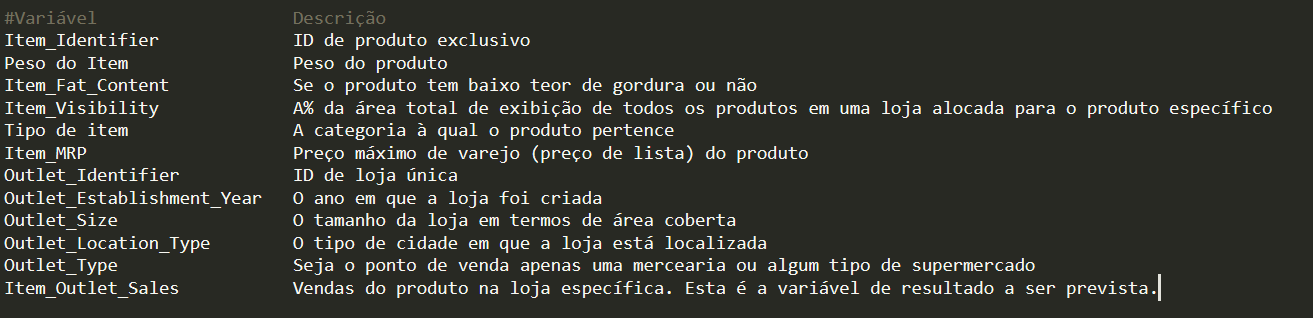

In [ ]:
from PIL import Image
%matplotlib inline
im = Image.open("/content/AD.PNG")
im.show()
im 

In [ ]:
# Instação do Algoritmo
!pip install catboost

In [8]:
#Importando Bibliotecas
import os
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [9]:
#Read training and testing files
train = pd.read_csv("/content/train_BM.csv")
test = pd.read_csv("/content/test_BM.csv")

# 2°  Análise Exploratória

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.head()

In [ ]:
train.isna().sum()

In [13]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


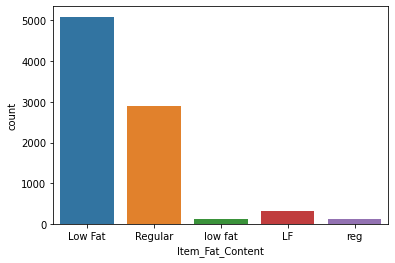

In [14]:
train.Item_Fat_Content.value_counts()
# Cria Visualização Gráfica
sns.countplot(train.Item_Fat_Content)

In [18]:
train.Outlet_Type.value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


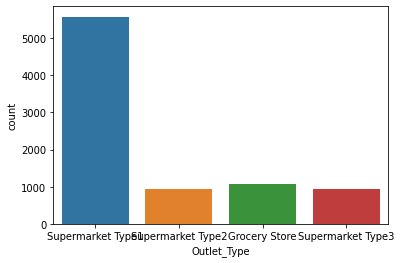

In [19]:
sns.countplot(train.Outlet_Type)

In [20]:
train.Outlet_Location_Type.value_counts() 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


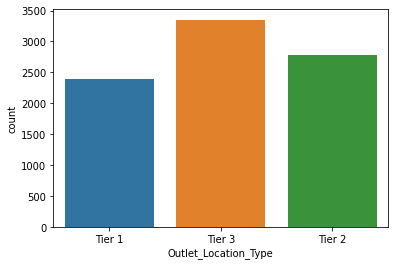

In [ ]:
sns.countplot(train.Outlet_Location_Type)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


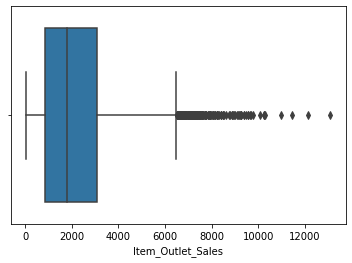

In [21]:
sns.boxplot(train.Item_Outlet_Sales,)

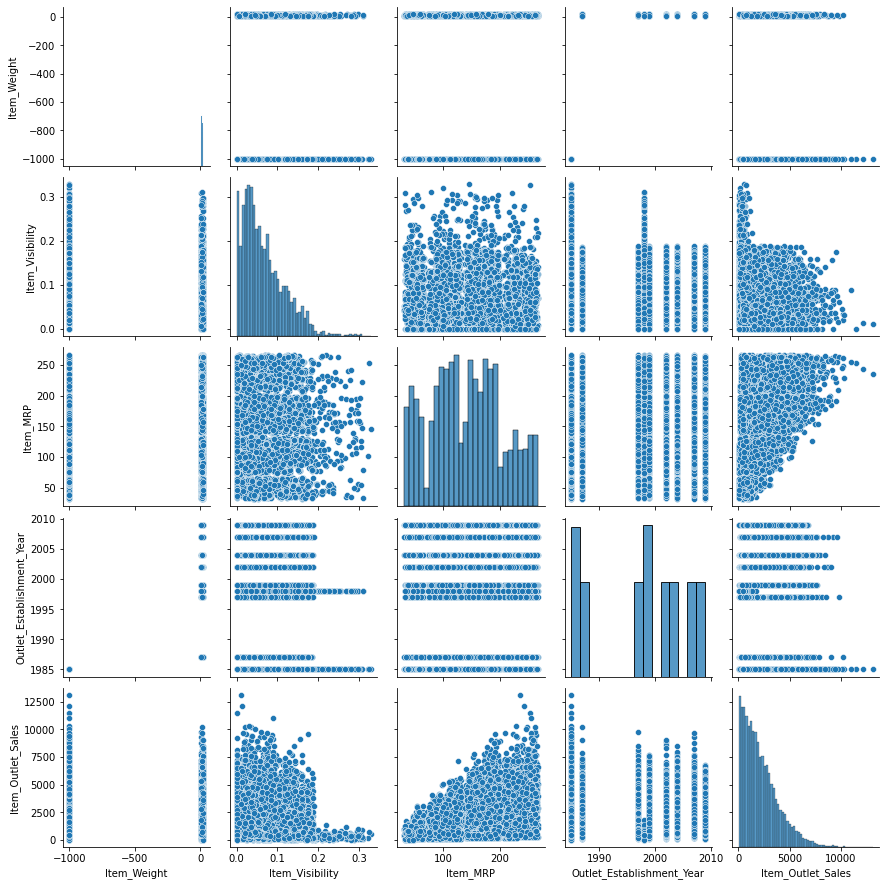

In [ ]:
sns.pairplot(train)

In [22]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#3° Pré-Processamento dos Dados

Obs: não realizarei engenharia de recursos, apenas construirei um modelo básico

In [ ]:
train.isna().sum()

In [24]:
#Imputing missing values for both train and test
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

In [28]:
#Creating a training set for modeling and validation set to check model performance
X = train.drop(['Item_Outlet_Sales'], axis=1)
y = train.Item_Outlet_Sales


X_train, X_teste, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)
#Criar indice das variáveis
categorical_features_indices = np.where(X.dtypes != np.float)[0]



# 4° Criação da Máquina Preditiva 

In [29]:
# Cria a Máquina Preditiva cujo RMSE é a métrica de Performance (erro quadrático médio para avaliar).
model  =  CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

# Treino e Teste da Máquina ao mesmo tempo
model.fit(X_train, y_train,  
          
          cat_features=categorical_features_indices,         # variáveis 

          eval_set=(X_teste, y_test),plot=True)   # Eval_set = dados de teste (validação) e plot é para plotar o treinamento

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1620.1680376	test: 1635.6537958	best: 1635.6537958 (0)	total: 57.3ms	remaining: 2.81s
1:	learn: 1549.5498543	test: 1567.6655130	best: 1567.6655130 (1)	total: 89.2ms	remaining: 2.14s
2:	learn: 1488.8064780	test: 1506.5232208	best: 1506.5232208 (2)	total: 102ms	remaining: 1.6s
3:	learn: 1435.5309961	test: 1456.5717400	best: 1456.5717400 (3)	total: 113ms	remaining: 1.3s
4:	learn: 1390.0985572	test: 1411.7996854	best: 1411.7996854 (4)	total: 119ms	remaining: 1.07s
5:	learn: 1350.2767051	test: 1373.4935581	best: 1373.4935581 (5)	total: 126ms	remaining: 920ms
6:	learn: 1315.8029758	test: 1339.2691549	best: 1339.2691549 (6)	total: 142ms	remaining: 874ms
7:	learn: 1285.3892250	test: 1310.3652215	best: 1310.3652215 (7)	total: 151ms	remaining: 794ms
8:	learn: 1261.0448409	test: 1286.9544433	best: 1286.9544433 (8)	total: 163ms	remaining: 742ms
9:	learn: 1238.3634073	test: 1264.4559800	best: 1264.4559800 (9)	total: 175ms	remaining: 700ms
10:	learn: 1216.8530466	test: 1245.3922279	best: 1

# 5° Avaliação da Máquina Preditiva

In [30]:
# Mostre a melhor Iteração
print(model.get_best_iteration())

49


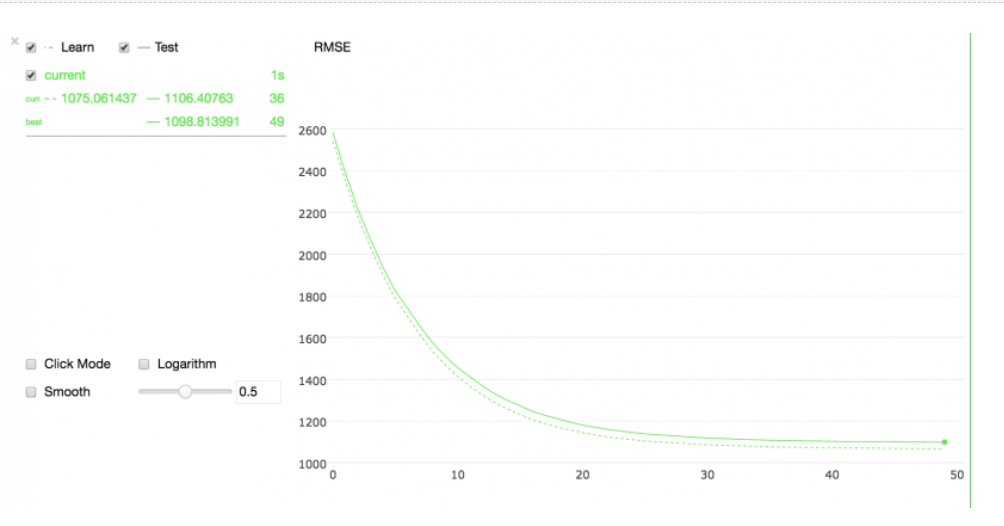

In [31]:
# Aprendizagem
from PIL import Image
%matplotlib inline
im = Image.open("/content/interations.PNG")
im.show()
im 

# Competições de Machine Learning

In [ ]:
# Plot do Output para submissão na Competição
submission = pd.DataFrame()

submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = model.predict(test)
submission


In [34]:
# exportação CSV
submission.to_csv("Submission.csv")

# Notas Finais

Esse algoritmo pode pode fornecer soluções de última geração por meio de Construção de Máquinas Preditivas para uma variedade de problemas de negócios.

Um dos principais recursos que me entusiasmam sobre esta biblioteca é lidar com valores categóricos automaticamente usando vários métodos estatísticos.

Cobrimos os detalhes básicos sobre esta biblioteca e resolvemos um desafio de regressão nesta aula. 

Também recomendo que você use esta biblioteca para resolver uma solução de negócios e verificar o desempenho em relação a outros modelos de última geração.

# Fim

## Valeu!

### #Instagram - Ciencia dos Dados <a href="http://instagram.com/cienciadosdados">instagram.com/cienciadosdados</a>

### #Facebook - Ciencia dos Dados <a href="http://facebook.com/cienciadosdadosbr">facebook.com/cienciadosdadosbr</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdadosraiz">https://t.me/cienciadosdadosraiz</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/c4wDGK9eUyc" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')